<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Cp2_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cp2. Supervised-learning

In [1]:
# 기초 세팅
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

Text(0, 0.5, '두 번째 특성')

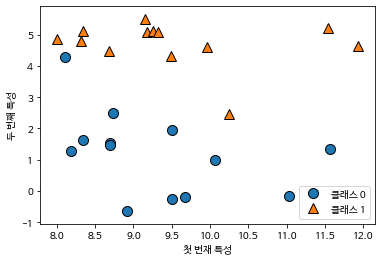

In [2]:
# forge 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번재 특성")
plt.ylabel("두 번째 특성")

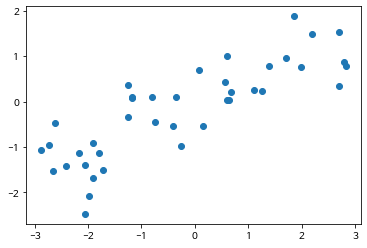

In [3]:
# wave 데이터 셋을 이용해 회귀 알고리즘 알아보기
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt=reload(plt)
plt.plot(X, y, 'o')
plt.ylim = (-3, 3)
plt.xlabel = "feature"
plt.ylabel = "target"

In [4]:
# 실제 유방암 데이터 이용해보기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.keys())
print("데이터의 형태 : ", cancer.data.shape)
print("클래스 별 샘플의 개수:\n", {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
데이터의 형태 :  (569, 30)
클래스 별 샘플의 개수:
 {'malignant': 212, 'benign': 357}


In [5]:
# 보스턴 주택 가격 데이터 이용해보기
from sklearn.datasets import load_boston
boston = load_boston()
print("X.shape : ", boston.data.shape)
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : ", X.shape)

X.shape :  (506, 13)
X.shape :  (506, 104)


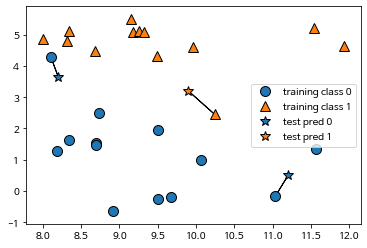

In [6]:
# k최근접 이웃
mglearn.plots.plot_knn_classification(n_neighbors=1)

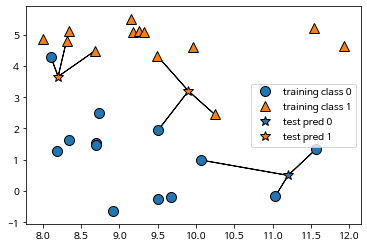

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
# k-최근접 이웃 알고리즘을 이용해 분류(classification) 해보기
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
print("3-최근접 이웃 알고리즘으로 결과 예측하기\n", clf.predict(X_test))
print("\n정확도 : {:.2f}" .format(clf.score(X_test, y_test)))

3-최근접 이웃 알고리즘으로 결과 예측하기
 [1 0 1 0 1 0 0]

정확도 : 0.86


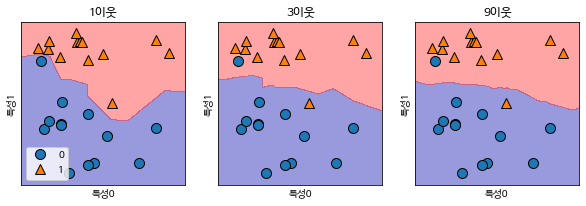

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}이웃" .format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend(loc = 3)

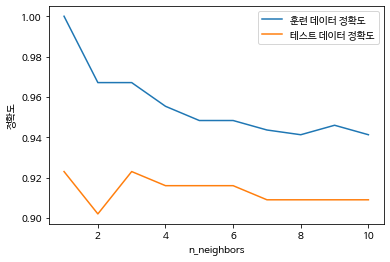

In [10]:
# 유방암 데이터로 분류(classification) 해보기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt=reload(plt)
plt.plot(neighbors_settings, training_accuracy, label = "훈련 데이터 정확도")                                               
plt.plot(neighbors_settings, test_accuracy, label = "테스트 데이터 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [11]:
# k-최근접 이웃 알고리즘을 이용해 회귀(regression)해보기
